In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
brasileirao = pd.read_csv('D:\\Dropbox\\Projeto Brasileirao\\dissertacao\\base_pronta_2014_2018.csv')
brasileirao_18 = brasileirao[brasileirao.Ano==2018]

In [3]:
brasileirao_18.sample(10)

,Ano,Rodada,home_team,away_team,placar_casa,placar_visitante,resultado,FS_h,FT_h,FD_h,FF_h,RB_h,FC_h,CA_h,FinC_h,Finalizacoes_h,FS_a,FT_a,FD_a,FF_a,RB_a,FC_a,CA_a,FinC_a,Finalizacoes_a,Proporcao_C_h,Proporcao_Tot_h,Proporcao_C_a,Proporcao_Tot_a,resultado_v
1575,2018,6,Sport,Corinthians,1.0,1.0,2,16.0,0.0,5.0,8.0,14.0,18.0,2.0,5.0,13.0,17.0,0.0,2.0,3.0,13.0,17.0,3.0,2.0,5.0,0.200000,0.076923,0.500000,0.200000,[0 1 0]
1694,2018,18,Grêmio,Vitória,4.0,0.0,1,18.0,0.0,5.0,5.0,19.0,19.0,1.0,5.0,10.0,17.0,0.0,3.0,7.0,13.0,17.0,3.0,3.0,10.0,0.800000,0.400000,0.000000,0.000000,[1 0 0]
1598,2018,8,Cruzeiro,Palmeiras,1.0,0.0,1,16.0,0.0,2.0,3.0,18.0,25.0,3.0,2.0,5.0,23.0,0.0,4.0,0.0,17.0,18.0,6.0,4.0,4.0,0.500000,0.200000,0.000000,0.000000,[1 0 0]
1679,2018,16,Internacional,Botafogo,3.0,0.0,1,14.0,1.0,6.0,3.0,20.0,13.0,1.0,7.0,10.0,14.0,0.0,3.0,3.0,19.0,14.0,2.0,3.0,6.0,0.428571,0.300000,0.000000,0.000000,[1 0 0]
1619,2018,10,Grêmio,Palmeiras,0.0,2.0,3,28.0,1.0,5.0,5.0,20.0,13.0,1.0,6.0,11.0,13.0,2.0,1.0,3.0,28.0,30.0,5.0,3.0,6.0,0.000000,0.000000,0.666667,0.333333,[0 0 1]
1648,2018,13,Corinthians,Botafogo,2.0,0.0,1,12.0,0.0,1.0,3.0,11.0,19.0,2.0,2.0,5.0,17.0,0.0,8.0,10.0,17.0,13.0,3.0,8.0,18.0,1.000000,0.400000,0.000000,0.000000,[1 0 0]
1781,2018,27,Santos,Atlético-PR,1.0,0.0,1,18.0,0.0,5.0,5.0,7.0,8.0,2.0,5.0,10.0,8.0,0.0,5.0,4.0,10.0,17.0,6.0,5.0,9.0,0.200000,0.100000,0.000000,0.000000,[1 0 0]
1839,2018,32,Atlético-MG,Grêmio,0.0,1.0,3,11.0,0.0,3.0,6.0,13.0,12.0,4.0,3.0,9.0,11.0,0.0,6.0,5.0,19.0,12.0,1.0,6.0,11.0,0.000000,0.000000,0.166667,0.090909,[0 0 1]
1881,2018,37,Botafogo,Paraná,2.0,1.0,1,15.0,0.0,4.0,6.0,18.0,13.0,1.0,4.0,10.0,12.0,0.0,3.0,4.0,15.0,16.0,3.0,3.0,7.0,0.500000,0.200000,0.333333,0.142857,[1 0 0]
1573,2018,6,América-MG,Botafogo,1.0,0.0,1,11.0,0.0,1.0,6.0,16.0,18.0,2.0,1.0,7.0,20.0,0.0,1.0,6.0,15.0,10.0,4.0,1.0,7.0,1.000000,0.142857,0.000000,0.000000,[1 0 0]


In [4]:
brasileirao_18 = pd.concat([brasileirao_18[['home_team','away_team','placar_casa', 'Rodada', 'Ano', 'FinC_h','Finalizacoes_h', 'RB_h','FC_h', 'Proporcao_C_h']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','placar_casa':'goals', 'FinC_h' : 'FinC','Finalizacoes_h': 'Finalizacoes', 'RB_h': 'RB','FC_h': 'FC',
                    'Proporcao_C_h':'Proporcao_C'}),
            brasileirao_18[['away_team','home_team','placar_visitante', 'Rodada', 'Ano','FinC_a','Finalizacoes_a', 'RB_a','FC_a', 'Proporcao_C_a']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','placar_visitante':'goals', 'FinC_a' : 'FinC','Finalizacoes_a': 'Finalizacoes', 'RB_a': 'RB','FC_a': 'FC', 'Proporcao_C_a':'Proporcao_C'})])
brasileirao_18.reset_index(drop=True,inplace=True)

In [5]:
pd.crosstab(brasileirao.Rodada, columns=brasileirao.Ano)

Ano,2014,2015,2016,2017,2018
Rodada,,,,,
1,10,10,10,10,10
2,10,10,10,10,10
3,10,10,10,10,10
4,10,10,10,10,10
5,10,10,10,10,10
6,10,10,10,10,10
7,10,10,10,10,10
8,10,10,10,10,10
9,10,10,10,10,10


In [6]:
brasileirao_18.describe()

,goals,Rodada,Ano,FinC,Finalizacoes,RB,FC,Proporcao_C,home
count,760.000000,760.000000,760.0,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1.089474,19.500000,2018.0,3.602632,9.034211,16.169737,15.381579,0.363291,0.500000
std,1.056953,10.973078,0.0,2.007232,3.632511,4.702353,4.255562,0.366324,0.500329
min,0.000000,1.000000,2018.0,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000
25%,0.000000,10.000000,2018.0,2.000000,6.000000,13.000000,13.000000,0.000000,0.000000
50%,1.000000,19.500000,2018.0,3.000000,9.000000,16.000000,15.000000,0.250000,0.500000
75%,2.000000,29.000000,2018.0,5.000000,11.000000,19.000000,18.000000,0.666667,1.000000
max,5.000000,38.000000,2018.0,14.000000,22.000000,36.000000,30.000000,1.000000,1.000000


In [7]:
brasileirao_18.head()

,team,opponent,goals,Rodada,Ano,FinC,Finalizacoes,RB,FC,Proporcao_C,home
0,América-MG,Sport,3.0,1,2018,3.0,11.0,30.0,11.0,1.000000,1
1,Cruzeiro,Grêmio,0.0,1,2018,6.0,10.0,21.0,21.0,0.000000,1
2,Vasco,Atlético-MG,2.0,1,2018,7.0,13.0,17.0,11.0,0.285714,1
3,Corinthians,Fluminense,2.0,1,2018,2.0,8.0,16.0,13.0,1.000000,1
4,Internacional,Bahia,2.0,1,2018,3.0,9.0,26.0,15.0,0.666667,1


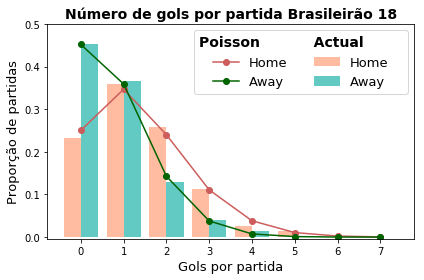

count    380.000000
mean       1.384211
std        1.115855
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: goals, dtype: float64
count    380.000000
mean       0.794737
std        0.904386
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: goals, dtype: float64


In [12]:
# construct Poisson  for each mean goals value
goals_h = brasileirao_18.goals[brasileirao_18.home==1]
goals_a = brasileirao_18.goals[brasileirao_18.home==0]
poisson_pred = np.column_stack([[poisson.pmf(i, [goals_h.mean(),goals_a.mean()][j]) for i in range(8)] for j in range(2)])
# plot histogram of actual goals
plt.hist([goals_h,goals_a], range(9), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", "#20B2AA"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Gols por partida",size=13)
plt.ylabel("Proporção de partidas",size=13)
plt.title("Número de gols por partida Brasileirão 18",size=14,fontweight='bold')
plt.ylim([-0.004, 0.5])
plt.tight_layout()
plt.show()
print(goals_h.describe())
print(goals_a.describe())

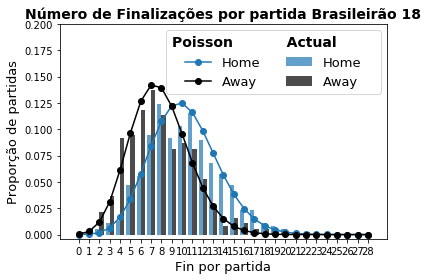

count    380.000000
mean      10.213158
std        3.522163
min        1.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       21.000000
Name: Finalizacoes, dtype: float64
count    380.000000
mean       7.855263
std        3.351461
min        0.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       22.000000
Name: Finalizacoes, dtype: float64


In [14]:
fina_h = brasileirao_18.Finalizacoes[brasileirao_18.home==1]
fina_a = brasileirao_18.Finalizacoes[brasileirao_18.home==0]
poisson_pred = np.column_stack([[poisson.pmf(i, [fina_h.mean(),fina_a.mean()][j]) for i in range(29)] for j in range(2)])
# plot histogram of actual goals
plt.hist([fina_h,fina_a], range(30), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["C0","#000000"])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,30)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = 'C0')
pois2, = plt.plot([i-0.5 for i in range(1,30)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#000000')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,30)],[i for i in range(30)])
plt.xlabel("Fin por partida",size=13)
plt.ylabel("Proporção de partidas",size=13)
plt.title("Número de Finalizações por partida Brasileirão 18",size=14,fontweight='bold')
plt.ylim([-0.004, 0.2])
plt.tight_layout()
plt.show()
print(fina_h.describe())
print(fina_a.describe())

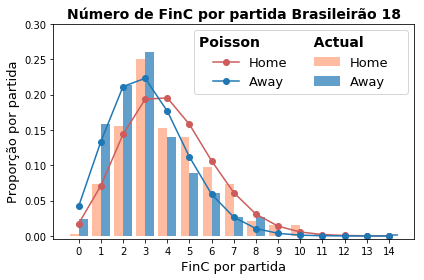

count    380.000000
mean       4.039474
std        2.051068
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       11.000000
Name: FinC, dtype: float64


In [15]:
fina_h = brasileirao_18.FinC[brasileirao_18.home==1]
fina_a = brasileirao_18.FinC[brasileirao_18.home==0]

poisson_pred = np.column_stack([[poisson.pmf(i, [fina_h.mean(),fina_a.mean()][j]) for i in range(15)] for j in range(2)])
# plot histogram of actual goals
plt.hist([fina_h,fina_a], range(16), 
         alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", 'C0'])

# add lines for the Poisson distributions
pois1, = plt.plot([i-0.5 for i in range(1,16)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,16)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = 'C0')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,16)],[i for i in range(16)])
plt.xlabel("FinC por partida",size=13)
plt.ylabel("Proporção por partida",size=13)
plt.title("Número de FinC por partida Brasileirão 18",size=14,fontweight='bold')
plt.ylim([-0.004, 0.3])
plt.tight_layout()
plt.show()
print(fina_h.describe())

In [11]:
# importing the tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
poisson_model_gol = smf.glm(formula="goals ~ 0 + home + team + opponent", data=brasileirao_18, 
                        family=sm.families.Poisson()).fit()
poisson_model_gol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -950.18
Date:                Tue, 26 Feb 2019   Deviance:                       726.22
Time:                        19:28:41   Pearson chi2:                     637.
No. Iterations:                     5   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
team[América-MG]             -0.3965      0.239     -1.661      0.097      -0.864       0.071
team[Atlético-MG]             0.1903      0.200      0.951      0.342      -0.202       0.582
team[Atlético-PR]             0.1473      0.202      0.730      0.465      -0.248       0.543
team[Bahia]                  -0.1740      0.219     -0.795      0.426      -0.603       0.255
team[Botafogo]               -0.1936      0.220     -0.879      0.379      -0.625       0.238
team[Ceará]                  -0.3748      0.231     -1.621      0.105      -0.828       0.078
team[Chapecoense]            -0.2988      0.227     -1.315      0.188      -0.744       0.146
team[Corinthians]            -0.3190      0.227     -1.404      0.160      -0.764       0.126
team[Cruzeiro]               -0.3203      0.227     -1.410      0.159      -0.766       0.125
team[Flamengo]                0.2427      0.197      1.231      0.218      -0.144       0.629
team[Fluminense]             -0.3659      0.231     -1.583      0.113      -0.819       0.087
team[Grêmio]                  0.0164      0.207      0.079      0.937      -0.390       0.423
team[Internacional]           0.0797      0.204      0.390      0.697      -0.321       0.480
team[Palmeiras]               0.3035      0.194      1.561      0.119      -0.078       0.685
team[Paraná]                 -0.9285      0.279     -3.331      0.001      -1.475      -0.382
team[Santos]                 -0.0317      0.211     -0.151      0.880      -0.445       0.381
team[Sport]                  -0.2620      0.225     -1.163      0.245      -0.703       0.179
team[São Paulo]              -0.0174      0.210     -0.083      0.934      -0.428       0.393
team[Vasco]                  -0.1148      0.216     -0.532      0.595      -0.538       0.308
team[Vitória]                -0.2259      0.223     -1.011      0.312      -0.664       0.212
opponent[T.Atlético-MG]      -0.0807      0.213     -0.379      0.705      -0.497       0.336
opponent[T.Atlético-PR]      -0.2105      0.220     -0.956      0.339      -0.642       0.221
opponent[T.Bahia]            -0.1267      0.214     -0.592      0.554      -0.546       0.293
opponent[T.Botafogo]         -0.0126      0.208     -0.061      0.951      -0.420       0.394
opponent[T.Ceará]            -0.1857      0.217     -0.857      0.392      -0.611       0.239
opponent[T.Chapecoense]       0.0857      0.202      0.423      0.672      -0.311       0.483
opponent[T.Corinthians]      -0.2916      0.223     -1.305      0.192      -0.730       0.146
opponent[T.Cruzeiro]         -0.3207      0.225     -1.423      0.155      -0.762       0.121
opponent[T.Flamengo]         -0.4471      0.236     -1.891      0.059      -0.911       0.016
opponent[T.Fluminense]       -0.0203      0.208     -0.098      0.922      -0.427       0.387
opponent[T.Grêmio]           -0.5340      0.242     -2.209  

In [13]:
poisson_model_FinC = smf.glm(formula= "FinC ~ 0 + home + team + opponent", data=brasileirao_18, 
                        family=sm.families.Poisson()).fit()
poisson_model_FinC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   FinC   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1498.6
Date:                Tue, 26 Feb 2019   Deviance:                       716.56
Time:                        19:28:42   Pearson chi2:                     718.
No. Iterations:                     4   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
team[América-MG]              1.1246      0.126      8.951      0.000       0.878       1.371
team[Atlético-MG]             1.4279      0.113     12.613      0.000       1.206       1.650
team[Atlético-PR]             1.4649      0.112     13.034      0.000       1.245       1.685
team[Bahia]                   1.3734      0.114     12.001      0.000       1.149       1.598
team[Botafogo]                1.2551      0.118     10.615      0.000       1.023       1.487
team[Ceará]                   1.2714      0.118     10.813      0.000       1.041       1.502
team[Chapecoense]             0.9735      0.128      7.625      0.000       0.723       1.224
team[Corinthians]             1.0828      0.124      8.712      0.000       0.839       1.326
team[Cruzeiro]                1.1882      0.120      9.890      0.000       0.953       1.424
team[Flamengo]                1.4178      0.113     12.505      0.000       1.196       1.640
team[Fluminense]              1.2231      0.119     10.264      0.000       0.990       1.457
team[Grêmio]                  1.3365      0.115     11.585      0.000       1.110       1.563
team[Internacional]           1.2021      0.120     10.046      0.000       0.968       1.437
team[Palmeiras]               1.3138      0.116     11.313      0.000       1.086       1.541
team[Paraná]                  1.0320      0.126      8.217      0.000       0.786       1.278
team[Santos]                  1.2424      0.118     10.486      0.000       1.010       1.475
team[Sport]                   1.3365      0.116     11.530      0.000       1.109       1.564
team[São Paulo]               1.1281      0.122      9.248      0.000       0.889       1.367
team[Vasco]                   1.2365      0.119     10.417      0.000       1.004       1.469
team[Vitória]                 1.2225      0.119     10.239      0.000       0.988       1.456
opponent[T.Atlético-MG]      -0.0516      0.117     -0.441      0.659      -0.281       0.178
opponent[T.Atlético-PR]       0.0639      0.114      0.562      0.574      -0.159       0.287
opponent[T.Bahia]            -0.2658      0.124     -2.148      0.032      -0.508      -0.023
opponent[T.Botafogo]         -0.0338      0.116     -0.291      0.771      -0.261       0.194
opponent[T.Ceará]            -0.1338      0.119     -1.123      0.262      -0.367       0.100
opponent[T.Chapecoense]      -0.1475      0.119     -1.239      0.216      -0.381       0.086
opponent[T.Corinthians]       0.1504      0.111      1.358      0.174      -0.067       0.367
opponent[T.Cruzeiro]         -0.1610      0.120     -1.343      0.179      -0.396       0.074
opponent[T.Flamengo]         -0.1252      0.119     -1.051      0.293      -0.359       0.108
opponent[T.Fluminense]       -0.0775      0.117     -0.660      0.509      -0.307       0.152
opponent[T.Grêmio]           -0.3685      0.127     -2.893  

In [14]:
poisson_model_gol_add = smf.glm(formula="goals ~ 0 + home + team + opponent + Finalizacoes ", data=brasileirao_18, 
                        family=sm.families.Poisson()).fit()
poisson_model_gol_add.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      719
Model Family:                 Poisson   Df Model:                           40
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -946.72
Date:                Tue, 26 Feb 2019   Deviance:                       719.30
Time:                        19:28:43   Pearson chi2:                     636.
No. Iterations:                     5   Covariance Type:             nonrobust
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
team[América-MG]             -0.2003      0.250     -0.802      0.422      -0.690       0.289
team[Atlético-MG]             0.4539      0.223      2.034      0.042       0.016       0.891
team[Atlético-PR]             0.4136      0.225      1.842      0.066      -0.027       0.854
team[Bahia]                   0.0822      0.239      0.343      0.731      -0.387       0.551
team[Botafogo]                0.0401      0.237      0.169      0.866      -0.425       0.505
team[Ceará]                  -0.1295      0.249     -0.520      0.603      -0.618       0.359
team[Chapecoense]            -0.0841      0.241     -0.349      0.727      -0.557       0.388
team[Corinthians]            -0.1298      0.238     -0.545      0.586      -0.597       0.337
team[Cruzeiro]               -0.0870      0.243     -0.358      0.721      -0.564       0.390
team[Flamengo]                0.4980      0.219      2.273      0.023       0.069       0.927
team[Fluminense]             -0.1425      0.246     -0.580      0.562      -0.624       0.339
team[Grêmio]                  0.2595      0.226      1.146      0.252      -0.184       0.703
team[Internacional]           0.2984      0.220      1.357      0.175      -0.133       0.730
team[Palmeiras]               0.5409      0.215      2.521      0.012       0.120       0.961
team[Paraná]                 -0.7039      0.291     -2.420      0.016      -1.274      -0.134
team[Santos]                  0.2059      0.229      0.898      0.369      -0.243       0.655
team[Sport]                  -0.0175      0.244     -0.072      0.943      -0.495       0.460
team[São Paulo]               0.1974      0.225      0.878      0.380      -0.243       0.638
team[Vasco]                   0.1156      0.233      0.497      0.619      -0.340       0.572
team[Vitória]                -0.0007      0.239     -0.003      0.998      -0.470       0.469
opponent[T.Atlético-MG]      -0.1018      0.213     -0.478      0.633      -0.519       0.315
opponent[T.Atlético-PR]      -0.1907      0.220     -0.866      0.387      -0.622       0.241
opponent[T.Bahia]            -0.1746      0.215     -0.813      0.416      -0.596       0.246
opponent[T.Botafogo]         -0.0264      0.208     -0.127      0.899      -0.434       0.381
opponent[T.Ceará]            -0.1678      0.217     -0.773      0.439      -0.593       0.258
opponent[T.Chapecoense]       0.0873      0.202      0.431      0.667      -0.310       0.484
opponent[T.Corinthians]      -0.2661      0.224     -1.189      0.234      -0.705       0.172
opponent[T.Cruzeiro]         -0.3532      0.226     -1.565      0.118      -0.796       0.089
opponent[T.Flamengo]         -0.4742      0.237     -2.004      0.045      -0.938      -0.010
opponent[T.Fluminense]       -0.0336      0.208     -0.162      0.871      -0.441       0.374
opponent[T.Grêmio]           -0.5948      0.243     -2.450  

In [15]:
poisson_model_gol.predict(pd.DataFrame(data={'team': 'Vasco', 'opponent': 'Botafogo',
                                       'home':1},index=[1]))

1    1.533264
dtype: float64

In [16]:
poisson_model_gol.predict(pd.DataFrame(data={'team': 'Botafogo', 'opponent': 'Vasco',
                                       'home':0},index=[1]))

1    0.852383
dtype: float64

In [17]:
team_pred = [[poisson.pmf(i, team_avg) for i in range(0, 3+1)] for team_avg in [1.5333, 0.8524]]

In [18]:
team_pred

[[0.21582227735470164,
  0.33092029786796406,
  0.25370004636047466,
  0.1296660936948386],
 [0.4263903660828803,
  0.36345514804904716,
  0.15490458409850394,
  0.04401355582852157]]

In [19]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    print('Prob Vitória Casa:', (1- skellam.cdf(0.0,  home_goals_avg,  away_goals_avg)).round(2))
    print('Prob Empate:', skellam.pmf(0.0,  home_goals_avg,  away_goals_avg).round(2))
    print('Prob Vitória Visitante:', skellam.cdf(-1,  home_goals_avg,  away_goals_avg).round(2))
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
simulate_match(poisson_model_gol, 'Vasco','Botafogo' , max_goals=3)

Prob Vitória Casa: 0.53
Prob Empate: 0.26
Prob Vitória Visitante: 0.21


array([[0.09202943, 0.07844432, 0.0334323 , 0.00949904],
       [0.1411054 , 0.12027584, 0.05126054, 0.01456454],
       [0.10817591, 0.0922073 , 0.03929797, 0.01116564],
       [0.0552874 , 0.04712604, 0.02008472, 0.00570662]])

In [20]:
Vas_Bot= simulate_match(poisson_model_gol, "Vasco", "Botafogo", max_goals=10)
# Vitória do Vasco
np.sum(np.tril(Vas_Bot, -1))

Prob Vitória Casa: 0.53
Prob Empate: 0.26
Prob Vitória Visitante: 0.21


0.5332849364308861

In [21]:
# Empate
np.sum(np.diag(Vas_Bot))

0.257801274769367

In [22]:
# Vitória Botafogo
np.sum(np.triu(Vas_Bot, 1))

0.20891310537899693

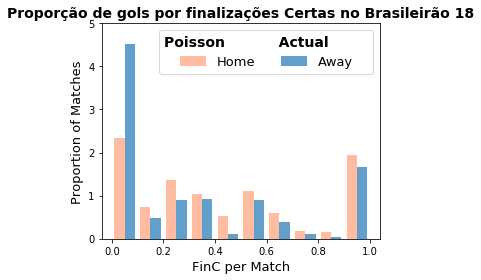

In [23]:
propc_h = brasileirao_18.Proporcao_C[brasileirao_18.home==1]
propc_a = brasileirao_18.Proporcao_C[brasileirao_18.home==0]
plt.hist([propc_h,propc_a], alpha=0.7, label=['Home', 'Away'],normed=True, color=["#FFA07A", 'C0'])
leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

#plt.xticks([i-0.5 for i in range(1,16)],[i for i in range(16)])
plt.xlabel("FinC per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Proporção de gols por finalizações Certas no Brasileirão 18",size=14,fontweight='bold')
plt.ylim([-0.004, 5])
plt.tight_layout()
plt.show()


In [24]:
logit_model_Prop = smf.glm(formula= "Proporcao_C ~ 0 + home + team + opponent", data=brasileirao_18, 
                        family=sm.families.Binomial()).fit()
#poisson_model_FinC.summary()

In [25]:
logit_model_Prop.predict(pd.DataFrame(data={'team': 'Vasco', 'opponent': 'Fluminense',
                                       'home':1},index=[1]))

1    0.40651
dtype: float64

In [26]:
logit_model_Prop.predict(pd.DataFrame(data={'team': 'Botafogo', 'opponent': 'Vasco',
                                       'home':0},index=[1]))

1    0.305958
dtype: float64

In [27]:
%%sh

UsageError: %%sh is a cell magic, but the cell body is empty.


In [ ]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf
star98 = sm.datasets.star98.load_pandas().data
formula = 'SUCCESS ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT + \
           PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF'
dta = star98[['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
              'PCTCHRT', 'PCTYRRND', 'PERMINTE', 'AVYRSEXP', 'AVSALK',
              'PERSPENK', 'PTRATIO', 'PCTAF']].copy()
endog = dta['NABOVE'] / (dta['NABOVE'] + dta.pop('NBELOW'))
del dta['NABOVE']
dta['SUCCESS'] = endog

In [ ]:
plt.hist(dta.SUCCESS, normed=True)

In [ ]:
def calc_proportion(dta)

In [ ]:
mod1 = smf.glm(formula=formula, data=dta, family=sm.families.Binomial()).fit()
mod1.summary()